In [ ]:
%%capture
!pip install vrplib

In [ ]:
!wget -P /content http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-A.zip
!wget -P /content http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-B.zip
!wget -P /content http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-E.zip

--2024-02-13 08:28:20--  http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-A.zip
Resolving vrp.atd-lab.inf.puc-rio.br (vrp.atd-lab.inf.puc-rio.br)... 139.82.16.196
Connecting to vrp.atd-lab.inf.puc-rio.br (vrp.atd-lab.inf.puc-rio.br)|139.82.16.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28296 (28K) [application/zip]
Saving to: ‘/content/Vrp-Set-A.zip’

Vrp-Set-A.zip       100%[===================>]  27.63K   171KB/s    in 0.2s    

2024-02-13 08:28:21 (171 KB/s) - ‘/content/Vrp-Set-A.zip’ saved [28296/28296]



In [ ]:
import vrplib
import zipfile
import numpy as np
import re
import matplotlib.pyplot as plt
import copy

In [ ]:
# setA
urlA = 'http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-A.zip'

filename = urlA.split('/')[-1]

archive = filename

with zipfile.ZipFile(archive, 'r') as myzip:
    myzip.extractall('.')
    tmp = myzip.namelist()[::-1]
    instances_A = tmp[1::2]
    solutions_A = tmp[::2]
    instances_A[-1], solutions_A[-2] = solutions_A[-2], instances_A[-1]
    solutions_A.pop()

print(instances_A)
print(solutions_A)

['A/A-n32-k5.vrp', 'A/A-n33-k5.vrp', 'A/A-n33-k6.vrp', 'A/A-n34-k5.vrp', 'A/A-n36-k5.vrp', 'A/A-n37-k5.vrp', 'A/A-n37-k6.vrp', 'A/A-n38-k5.vrp', 'A/A-n39-k5.vrp', 'A/A-n39-k6.vrp', 'A/A-n44-k6.vrp', 'A/A-n45-k6.vrp', 'A/A-n45-k7.vrp', 'A/A-n46-k7.vrp', 'A/A-n48-k7.vrp', 'A/A-n53-k7.vrp', 'A/A-n54-k7.vrp', 'A/A-n55-k9.vrp', 'A/A-n60-k9.vrp', 'A/A-n61-k9.vrp', 'A/A-n62-k8.vrp', 'A/A-n63-k10.vrp', 'A/A-n63-k9.vrp', 'A/A-n64-k9.vrp', 'A/A-n65-k9.vrp', 'A/A-n69-k9.vrp', 'A/A-n80-k10.vrp']
['A/A-n32-k5.sol', 'A/A-n33-k5.sol', 'A/A-n33-k6.sol', 'A/A-n34-k5.sol', 'A/A-n36-k5.sol', 'A/A-n37-k5.sol', 'A/A-n37-k6.sol', 'A/A-n38-k5.sol', 'A/A-n39-k5.sol', 'A/A-n39-k6.sol', 'A/A-n44-k6.sol', 'A/A-n45-k6.sol', 'A/A-n45-k7.sol', 'A/A-n46-k7.sol', 'A/A-n48-k7.sol', 'A/A-n53-k7.sol', 'A/A-n54-k7.sol', 'A/A-n55-k9.sol', 'A/A-n60-k9.sol', 'A/A-n61-k9.sol', 'A/A-n62-k8.sol', 'A/A-n63-k10.sol', 'A/A-n63-k9.sol', 'A/A-n64-k9.sol', 'A/A-n65-k9.sol', 'A/A-n69-k9.sol', 'A/A-n80-k10.sol']


In [ ]:
# setB
urlB = 'http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-B.zip'

filename = urlB.split('/')[-1]

archive = filename

with zipfile.ZipFile(archive, 'r') as myzip:
    myzip.extractall('.')
    tmp = myzip.namelist()[::-1]
    instances_B = []
    solutions_B = []
    for elem in tmp:
        if elem[-3:] == 'vrp':
            instances_B.append(elem)
        elif elem[-3:] == 'sol':
            solutions_B.append(elem)

print(instances_B)
print(solutions_B)

['B/B-n31-k5.vrp', 'B/B-n34-k5.vrp', 'B/B-n35-k5.vrp', 'B/B-n38-k6.vrp', 'B/B-n39-k5.vrp', 'B/B-n41-k6.vrp', 'B/B-n43-k6.vrp', 'B/B-n44-k7.vrp', 'B/B-n45-k5.vrp', 'B/B-n45-k6.vrp', 'B/B-n50-k7.vrp', 'B/B-n50-k8.vrp', 'B/B-n51-k7.vrp', 'B/B-n52-k7.vrp', 'B/B-n56-k7.vrp', 'B/B-n57-k7.vrp', 'B/B-n57-k9.vrp', 'B/B-n63-k10.vrp', 'B/B-n64-k9.vrp', 'B/B-n66-k9.vrp', 'B/B-n67-k10.vrp', 'B/B-n68-k9.vrp', 'B/B-n78-k10.vrp']
['B/B-n31-k5.sol', 'B/B-n34-k5.sol', 'B/B-n35-k5.sol', 'B/B-n38-k6.sol', 'B/B-n39-k5.sol', 'B/B-n41-k6.sol', 'B/B-n43-k6.sol', 'B/B-n44-k7.sol', 'B/B-n45-k5.sol', 'B/B-n45-k6.sol', 'B/B-n50-k7.sol', 'B/B-n50-k8.sol', 'B/B-n51-k7.sol', 'B/B-n52-k7.sol', 'B/B-n56-k7.sol', 'B/B-n57-k7.sol', 'B/B-n63-k10.sol', 'B/B-n64-k9.sol', 'B/B-n66-k9.sol', 'B/B-n67-k10.sol', 'B/B-n68-k9.sol', 'B/B-n78-k10.sol', 'B/B-n57-k9.sol']


In [ ]:
# setE
urlE = 'http://vrp.atd-lab.inf.puc-rio.br/media/com_vrp/instances/Vrp-Set-E.zip'

filename = urlE.split('/')[-1]

archive = filename

with zipfile.ZipFile(archive, 'r') as myzip:
    myzip.extractall('.')
    tmp = myzip.namelist()[::-1]
    instances_E = []
    solutions_E = []
    for elem in tmp:
        if elem[-3:] == 'vrp':
            instances_E.append(elem)
        elif elem[-3:] == 'sol':
            solutions_E.append(elem)

print(instances_E)
print(solutions_E)

['E/E-n101-k14.vrp', 'E/E-n101-k8.vrp', 'E/E-n13-k4.vrp', 'E/E-n22-k4.vrp', 'E/E-n23-k3.vrp', 'E/E-n30-k3.vrp', 'E/E-n31-k7.vrp', 'E/E-n33-k4.vrp', 'E/E-n51-k5.vrp', 'E/E-n76-k10.vrp', 'E/E-n76-k14.vrp', 'E/E-n76-k7.vrp', 'E/E-n76-k8.vrp']
['E/E-n101-k14.sol', 'E/E-n101-k8.sol', 'E/E-n13-k4.sol', 'E/E-n22-k4.sol', 'E/E-n23-k3.sol', 'E/E-n30-k3.sol', 'E/E-n31-k7.sol', 'E/E-n33-k4.sol', 'E/E-n51-k5.sol', 'E/E-n76-k10.sol', 'E/E-n76-k14.sol', 'E/E-n76-k8.sol', 'E/E-n76-k7.sol']


In [ ]:
def cars(cvrp_problem: dict):
    cars, optimal = map(int, re.findall('\d+', cvrp_problem['comment']))
    return cars

def min_distance(cvrp_problem: dict):
    distances = cvrp_problem['edge_weight']
    minimum = distances[0][1]
    for i in range(len(distances)):
        for j in range(i, len(distances[0])):
            if 0 < distances[i][j] < minimum:
                minimum = distances[i][j]
    return minimum

In [ ]:
class Ants:
    def __init__(self, instance, num_vertices, num_ants, alpha, beta, q0, tau_0, ITERATIONS):
        self.instance = instance
        self.num_vertices = num_vertices
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.q0 = q0
        self.tau_0 = tau_0
        self.ITERATIONS = ITERATIONS

    def _pheromones_init(self):
        result = np.ones_like(self.instance['edge_weight']) * self.tau_0
        for i in range(len(result)):
            result[i][i] = 0
        return result

    def _local_pheromones_update(self, ant_route, len_route):
        for i in range(len(ant_route) - 1):
            # tau_0 = ((self.num_vertices + 1) * len_route) ** (-1) # adaptive tau_0?
            tau = self.pheromones[ant_route[i]][ant_route[i+1]]
            self.pheromones[ant_route[i]][ant_route[i+1]] = (1 - self.alpha) * tau + self.alpha * self.tau_0
            self.pheromones[ant_route[i+1]][ant_route[i]] = self.pheromones[ant_route[i]][ant_route[i+1]]
        return self.pheromones

    def _global_pheromones_update(self, ant_routes, len_routes):
        best_len = min(len_routes)
        best_index = len_routes.index(best_len)
        best_route = ant_routes[best_index]
        for i in range(len(best_route) - 1):
            tau = self.pheromones[best_route[i]][best_route[i+1]]
            self.pheromones[best_route[i]][best_route[i+1]] = (1 - self.alpha) * tau + self.alpha / best_len
            self.pheromones[best_route[i+1]][best_route[i]] = self.pheromones[best_route[i]][best_route[i+1]]
        return self.pheromones

    def _select_next_vertex(self, current_vertex, visited_vertices):
        unvisited_vertices = [vertex for vertex in range(self.num_vertices) if vertex not in visited_vertices]
        probabilities = [self.pheromones[current_vertex][next_vertex] * (1 / self.instance['edge_weight'][current_vertex][next_vertex]) ** self.beta for next_vertex in unvisited_vertices]
        probabilities = np.nan_to_num(probabilities) # not good
        tmp = np.argmax(probabilities)
        if len(unvisited_vertices) > 1:
            probabilities[tmp] = 0
            probabilities /= np.sum(probabilities)
            probabilities *= (1 - self.q0)
            probabilities[tmp] = self.q0
            next_vertex = np.random.choice(unvisited_vertices, p=probabilities)
        else:
            next_vertex = unvisited_vertices[tmp]
        return next_vertex

    def _next_vertex_demand(self, next_vertex):
        demand = self.instance['demand'][next_vertex]
        return demand

    def _distance_between(self, current_vertex, next_vertex):
        distance = self.instance['edge_weight'][current_vertex][next_vertex]
        return distance

    def run(self):
        np.random.seed(100)
        self.pheromones = self._pheromones_init()
        for i in range(self.ITERATIONS):
            self.ant_routes = []
            self.len_routes = []
            depot = 0
            self.visited_vertices = [depot]

            for ant in range(self.num_ants):
                self.current_vertex = depot
                self.ant_route = [self.current_vertex]

                len_route = 0
                next_demand = 0
                capacity = self.instance['capacity']

                while len(self.visited_vertices) < self.num_vertices:
                    next_vertex = self._select_next_vertex(self.current_vertex, self.visited_vertices)
                    next_demand = self._next_vertex_demand(next_vertex)
                    if next_demand > capacity:
                        break

                    self.ant_route.append(next_vertex)
                    self.visited_vertices.append(next_vertex)
                    len_route += self._distance_between(self.current_vertex, next_vertex)
                    capacity -= next_demand
                    self.current_vertex = next_vertex

                self.ant_route.append(0)
                len_route += self._distance_between(self.current_vertex, 0)
                self.ant_routes.append(self.ant_route)
                self.len_routes.append(len_route)

                self._local_pheromones_update(self.ant_route, len_route)

            self._global_pheromones_update(self.ant_routes, self.len_routes)

        return self

        def ant_routes(self):
            return self.ant_routes

        def len_routes(self):
            return self.len_routes

In [ ]:
def drawing_ants(ant_routes, num_ants, cvrp_problem):
    nodes_coord = dict()
    for i in range(cvrp_problem['dimension']):
        nodes_coord[i] = cvrp_problem['node_coord'][i]

    draw_depot = cvrp_problem['node_coord'][0]
    x = cvrp_problem['node_coord'][1:, 0]
    y = cvrp_problem['node_coord'][1:, 1]

    plt.figure(figsize=(8, 6))

    plt.scatter(*draw_depot, color='red', linewidth=8)
    plt.scatter(x, y)

    ant_routes_draw = copy.deepcopy(ant_routes)

    colours = ['blue', 'red', 'green', 'orange', 'purple']

    for i in range(num_ants):
        line_x = []
        line_y = []
        for elem in ant_routes_draw[i]:
            line_x.append(list(nodes_coord[elem])[0])
            line_y.append(list(nodes_coord[elem])[1])
            if num_ants <= len(colours):
                plt.plot(line_x, line_y, color = colours[i], linestyle='dashed')
            else:
                plt.plot(line_x, line_y, linestyle='dashed')

    plt.grid()
    plt.show()

In [ ]:
def running_ants(instances, alpha, beta, q0, ITERATIONS):
    costs_ants = []
    for elem in instances:
        instance = vrplib.read_instance(elem)
        num_vertices = instance['dimension']
        num_ants = cars(instance)
        # alpha = 0.9
        # beta = 2.4
        # q0 = 0.9
        tau_0 = ((num_vertices + 1)* min_distance(instance)) ** (-1)

        ant = Ants(instance, num_vertices, num_ants, alpha, beta, q0, tau_0, ITERATIONS)
        ant.run()
        costs_ants.append(np.sum(ant.len_routes))

    return costs_ants

In [ ]:
%%time
Set_A_result = running_ants(instances_A, alpha=0.2, beta=2.5, q0=0.9, ITERATIONS=1000)
Set_A_result

<ipython-input-71-c47e65287362>:41: RuntimeWarning: divide by zero encountered in double_scalars
  probabilities = [self.pheromones[current_vertex][next_vertex] * (1 / self.instance['edge_weight'][current_vertex][next_vertex]) ** self.beta for next_vertex in unvisited_vertices]


CPU times: user 4min 35s, sys: 6.36 s, total: 4min 41s
Wall time: 4min 43s


[1032.1063551413695,
 834.0492884812063,
 757.187048811671,
 913.3440468837184,
 1116.6709892028111,
 894.333976111143,
 1096.70598315386,
 878.8009241586522,
 1035.118951214395,
 1057.4692400814306,
 1103.764821566912,
 1120.8525719494035,
 1467.0268350157173,
 1390.2759215015308,
 1304.1103485654162,
 1225.7915656917091,
 1466.881864836887,
 1373.890672111213,
 1490.9258663217822,
 1047.4521190233334,
 1575.8458538033547,
 1654.4268642366128,
 1780.526867356045,
 1473.8901823253675,
 1525.5343324536896,
 1510.2929740631866,
 2112.2306001556585]

In [ ]:
%%time
Set_B_result = running_ants(instances_B, alpha=0.9, beta=2, q0=0.9, ITERATIONS=1000)
Set_B_result

<ipython-input-71-c47e65287362>:41: RuntimeWarning: divide by zero encountered in double_scalars
  probabilities = [self.pheromones[current_vertex][next_vertex] * (1 / self.instance['edge_weight'][current_vertex][next_vertex]) ** self.beta for next_vertex in unvisited_vertices]


CPU times: user 4min 10s, sys: 6.28 s, total: 4min 16s
Wall time: 4min 14s


[828.8318928072779,
 825.8482130153809,
 1042.624333928901,
 861.651378718256,
 678.316647455806,
 1042.006664013473,
 911.0743204594362,
 1052.267097685206,
 945.2460221514519,
 764.8748154615962,
 966.8438483785757,
 1324.4163547409516,
 1224.9006936595201,
 918.9817377652937,
 930.660796234508,
 1408.8694724696056,
 1799.987293664399,
 1740.472269863289,
 910.4802398053001,
 1500.4101618775617,
 1175.962499048572,
 1451.034038192282,
 1487.1530776918198]

In [ ]:
%%time
Set_E_result = running_ants(instances_E, alpha=0.3, beta=2.4, q0=0.9, ITERATIONS=1000)
Set_E_result

CPU times: user 3min 19s, sys: 5.52 s, total: 3min 24s
Wall time: 3min 24s


[1354.598007970632,
 1143.754691644278,
 366.0,
 437.07684288851755,
 470.20940131149496,
 642.8371401834474,
 1230.0,
 1004.6406836932788,
 720.5743678467508,
 955.8109404766301,
 1038.1204950748681,
 926.5774456676588,
 993.7697555727941]

In [ ]:
def diff(a, b):
    result = abs(a - b) / a
    return result

def plotting(solutions, instances, result, text):
    dimensions = []
    for elem in instances:
        dimensions.append(vrplib.read_instance(elem)['dimension'])

    costs_optimal = []
    for elem in solutions:
        costs_optimal.append(vrplib.read_solution(elem)['cost'])

    diffes = []
    for i in range(len(costs_optimal)):
        diffes.append(diff(costs_optimal[i], result[i]))

    plt.figure(figsize=(8, 6))
    plt.plot(dimensions, diffes)
    plt.title(text)
    plt.xlabel('nodes', size=14)
    plt.ylabel('error', size=14)
    plt.grid()
    plt.show()

def plotting_scatter(solutions, instances, result, text):
    dimensions = []
    for elem in instances:
        dimensions.append(vrplib.read_instance(elem)['dimension'])

    costs_optimal = []
    for elem in solutions:
        costs_optimal.append(vrplib.read_solution(elem)['cost'])

    diffes = []
    for i in range(len(costs_optimal)):
        diffes.append(diff(costs_optimal[i], result[i]))

    plt.figure(figsize=(8, 6))
    plt.scatter(dimensions, diffes)
    plt.title(text)
    plt.xlabel('nodes', size=14)
    plt.ylabel('error', size=14)
    plt.grid()
    plt.show()

def plotting_hybrid(solutions, instances, result, text):
    dimensions = []
    for elem in instances:
        dimensions.append(vrplib.read_instance(elem)['dimension'])

    costs_optimal = []
    for elem in solutions:
        costs_optimal.append(vrplib.read_solution(elem)['cost'])

    diffes = []
    for i in range(len(costs_optimal)):
        diffes.append(diff(costs_optimal[i], result[i]))

    plt.figure(figsize=(8, 6))
    plt.scatter(dimensions, diffes, linewidths=1)
    plt.plot(dimensions, diffes)
    plt.title(text)
    plt.xlabel('nodes', size=14)
    plt.ylabel('error', size=14)
    plt.grid()
    plt.show()

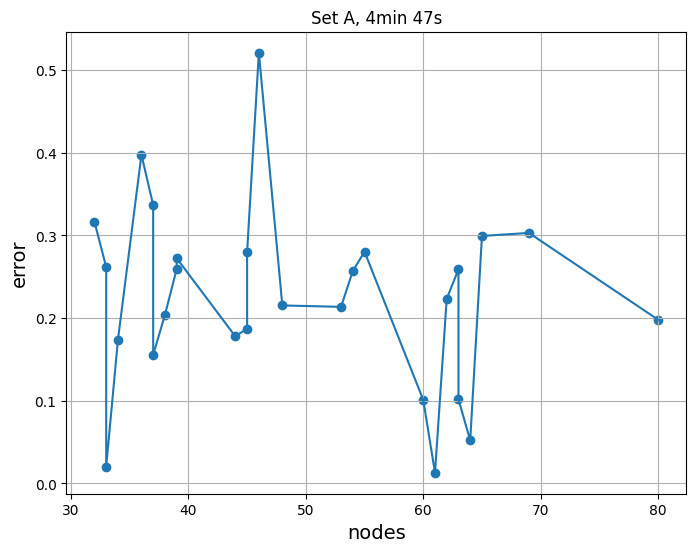

In [ ]:
# alpha = 0.2
# beta = 2.5
# q0 = 0.9

plotting_hybrid(solutions_A, instances_A, Set_A_result, 'Set A, 4min 47s')

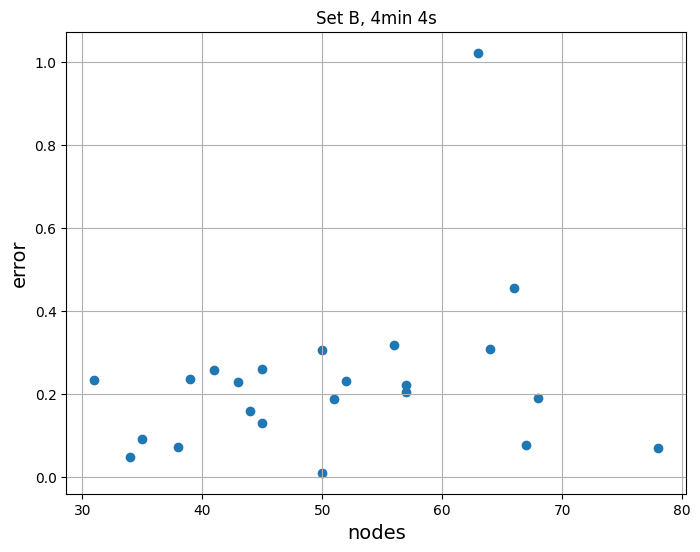

In [ ]:
# alpha = 0.9
# beta = 2
# q0 = 0.9

plotting_scatter(solutions_B, instances_B, Set_B_result, 'Set B, 4min 4s')

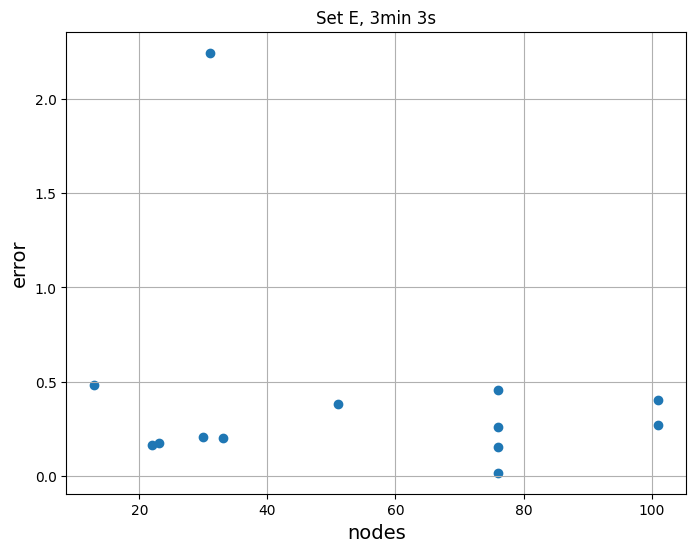

In [ ]:
# alpha = 0.3
# beta = 2.4
# q0 = 0.9

plotting_scatter(solutions_E, instances_E, Set_E_result, 'Set E, 3min 3s')